In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
img_path='../datasets/BSD100/101085_HR.png'
print(os.path.exists(img_path))

True


(480, 320, 3) uint8


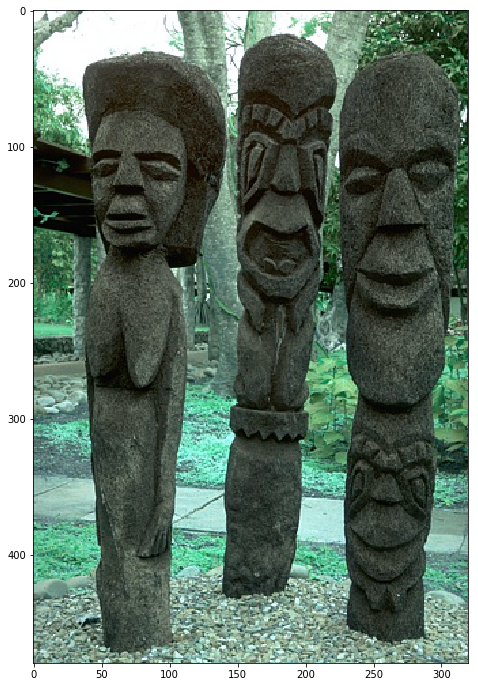

In [4]:
img_hr_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
print(img_hr_bgr.shape, img_hr_bgr.dtype)
plt.figure(figsize=(12,12))
plt.imshow(img_hr_bgr)

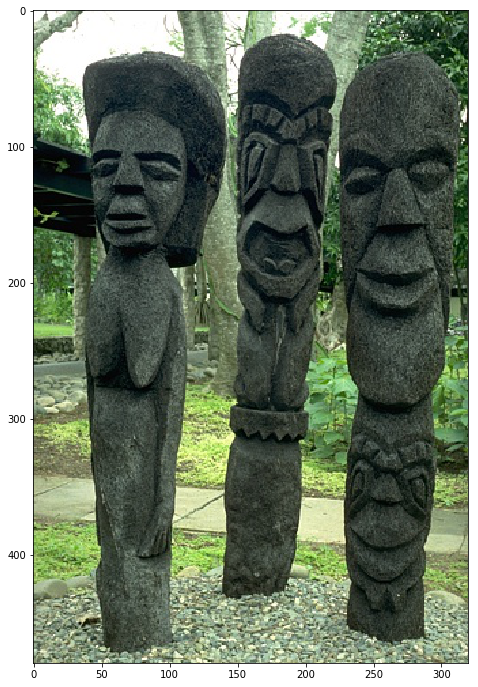

In [5]:
img_hr_rgb = cv2.cvtColor(img_hr_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_hr_rgb)

(480, 320) (240, 160)
(240, 160, 3) uint8


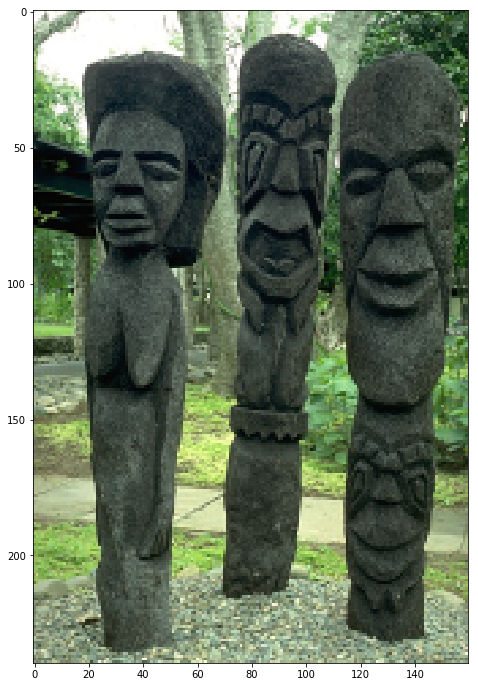

In [6]:
hr_size = tuple(img_hr_rgb.shape[:2])
lr_size = (hr_size[0]//2, hr_size[1]//2)
print(hr_size, lr_size)

img_lr_rgb = cv2.resize(img_hr_rgb, lr_size[::-1], interpolation=cv2.INTER_LINEAR)
print(img_lr_rgb.shape, img_lr_rgb.dtype)
plt.figure(figsize=(12,12))
plt.imshow(img_lr_rgb)

(480, 320, 3) uint8


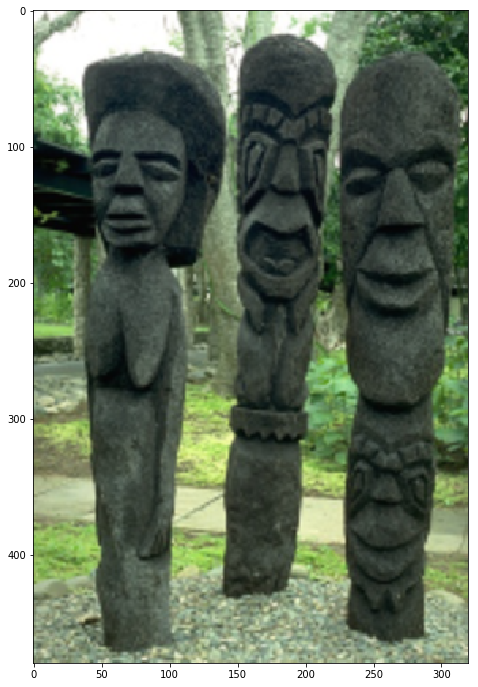

In [7]:
img_sr_rgb = cv2.resize(img_lr_rgb, hr_size[::-1], interpolation=cv2.INTER_LINEAR)
print(img_sr_rgb.shape, img_sr_rgb.dtype)
plt.figure(figsize=(12,12))
plt.imshow(img_sr_rgb)

In [8]:
def compute_mse(img_sr, img_hr):
    return np.mean(np.square(img_sr_rgb-img_hr_rgb))

def compute_psnr(mse):
    if mse == 0.:
        psnr = 100
    else:
        psnr = 20 * np.log10(255. / np.sqrt(mse))
    return psnr

In [9]:
img_sr_rgb = cv2.resize(img_lr_rgb, hr_size[::-1], interpolation=cv2.INTER_LINEAR)
print(img_sr_rgb.shape, img_sr_rgb.dtype)

mse = compute_mse(img_sr=img_sr_rgb, img_hr=img_hr_rgb)
psnr = compute_psnr(mse)

print("MSE = ", mse)
print("PSNR = {} dB".format(psnr))

(480, 320, 3) uint8
MSE =  65.9
PSNR = 29.941949462739004 dB


In [10]:
img_sr_rgb = cv2.resize(img_lr_rgb, hr_size[::-1], interpolation=cv2.INTER_CUBIC)
print(img_sr_rgb.shape, img_sr_rgb.dtype)

mse = compute_mse(img_sr=img_sr_rgb, img_hr=img_hr_rgb)
psnr = compute_psnr(mse)

print("MSE = ", mse)
print("PSNR = {} dB".format(psnr))

(480, 320, 3) uint8
MSE =  63.2227907986
PSNR = 30.122066981893152 dB


In [11]:
img_sr_rgb = cv2.resize(img_lr_rgb, hr_size[::-1], interpolation=cv2.INTER_NEAREST)
print(img_sr_rgb.shape, img_sr_rgb.dtype)

mse = compute_mse(img_sr=img_sr_rgb, img_hr=img_hr_rgb)
psnr = compute_psnr(mse)

print("MSE = ", mse)
print("PSNR = {} dB".format(psnr))

(480, 320, 3) uint8
MSE =  63.0377365451
PSNR = 30.134797500349535 dB


In [12]:
img_sr_rgb = cv2.resize(img_lr_rgb, hr_size[::-1], interpolation=cv2.INTER_LANCZOS4)
print(img_sr_rgb.shape, img_sr_rgb.dtype)

mse = compute_mse(img_sr=img_sr_rgb, img_hr=img_hr_rgb)
psnr = compute_psnr(mse)

print("MSE = ", mse)
print("PSNR = {} dB".format(psnr))

(480, 320, 3) uint8
MSE =  63.6570203993
PSNR = 30.09234054173629 dB
